# Linear Regression

Predict the best Y for any given X (linear regression)

In [1]:
# %pip install matplotlib
# %pip install numpy
# %pip install torch

import matplotlib.pyplot as plt
import numpy as np
import torch

# We are defaulting to CPU, but you may want to compare CPU vs GPU performance
# device = "mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu" # Use cpu since this dataset is too small to take advantage of the GPU

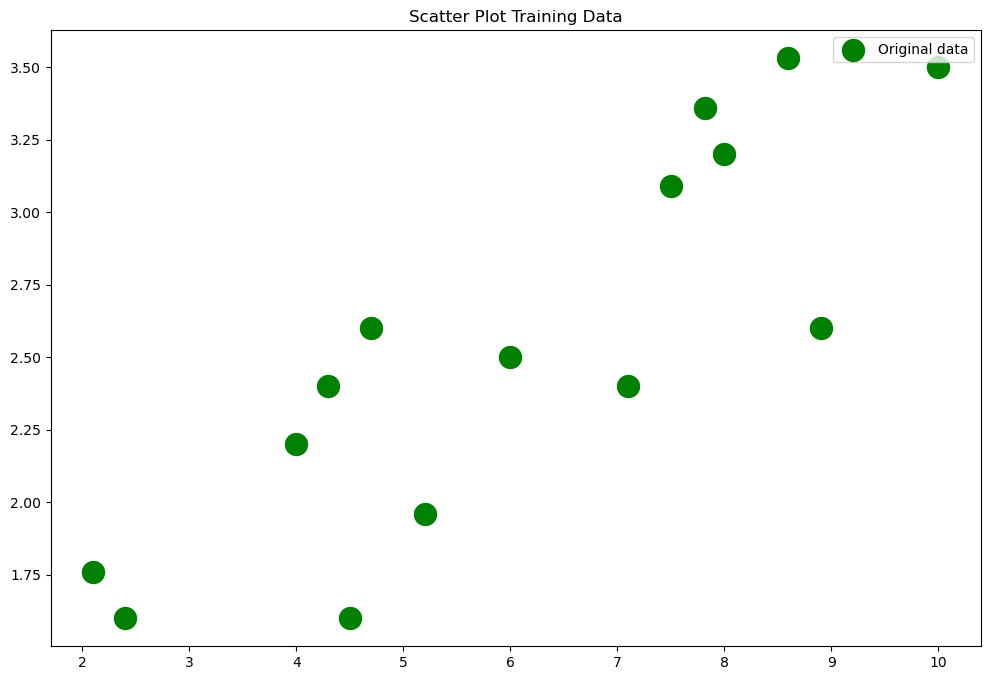

In [2]:
# Generate mock data
x_train_numpy = np.array([[4.7],[2.4],[7.5],[7.1],[4.3],[7.816],[8.9],[5.2],[8.59],[2.1],[8],[10],[4.5],[6],[4]], dtype=np.float32)
y_train_numpy = np.array([[2.6],[1.6],[3.09],[2.4],[2.4],[3.357],[2.6],[1.96],[3.53],[1.76],[3.2],[3.5],[1.6],[2.5],[2.2]], dtype=np.float32)
# Convert data to tensors and set requires_grad=True for computing gradients
x_train_tensor = torch.from_numpy(x_train_numpy).to(device)
x_train_tensor.requires_grad = True
y_train_tensor = torch.from_numpy(y_train_numpy).to(device)
# Display Scattter Plot
plt.figure(figsize=(12,8))
plt.scatter(x_train_numpy, y_train_numpy, label='Original data', s=250, c='g')
plt.legend()
plt.title("Scatter Plot Training Data")
plt.show()

Epoch 10 (10%), Loss: 10.73
Epoch 20 (20%), Loss: 6.39
Epoch 30 (30%), Loss: 4.46
Epoch 40 (40%), Loss: 3.44
Epoch 50 (50%), Loss: 2.82
Epoch 60 (60%), Loss: 2.41
Epoch 70 (70%), Loss: 2.11
Epoch 80 (80%), Loss: 1.89
Epoch 90 (90%), Loss: 1.71
Epoch 100 (100%), Loss: 1.58


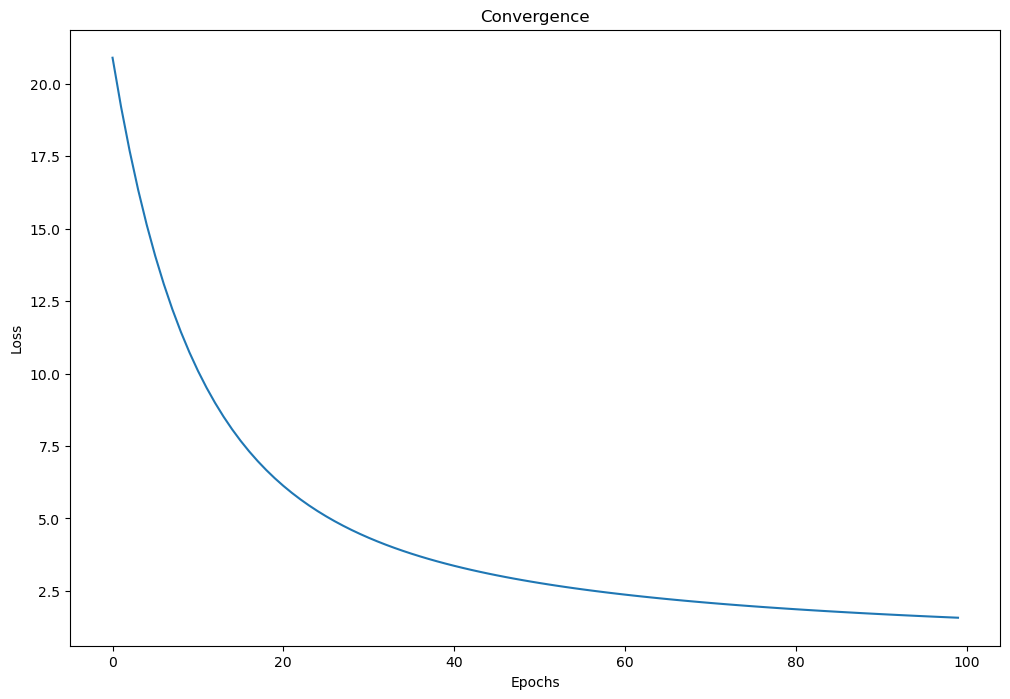

In [3]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1) # One input feature, one output feature

    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression().to(device)
criterion = torch.nn.MSELoss() # Mean Squared Error loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.001) # Stochastic Gradient Descent optimizer

# Train the model
def train(x_train_tensor, y_train_tensor, model, criterion, optimizer, num_epochs):
    total_loss = 0
    plot_losses = []
    model.train() # Put the model in "training mode", which turns on dropout and batch normalization
    for epoch in range(1, num_epochs+1):
        y_predicted = model(x_train_tensor)
        loss = criterion(y_predicted, y_train_tensor)
        optimizer.zero_grad()
        loss.backward() # Calculate gradients
        optimizer.step()
        total_loss += loss.item()
        if epoch % 10 == 0:  # Show progress every 1000 passes
            percentComplete = epoch/num_epochs*100
            print(f'Epoch {epoch} ({percentComplete:.0f}%), Loss: {total_loss/epoch:.2f}')
        plot_losses.append(total_loss/epoch)
    return plot_losses

plot_losses = train(x_train_tensor, y_train_tensor, model, criterion, optimizer, num_epochs = 100)
fig, ax = plt.subplots(figsize=(12, 8))
plt.title("Convergence")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(plot_losses)

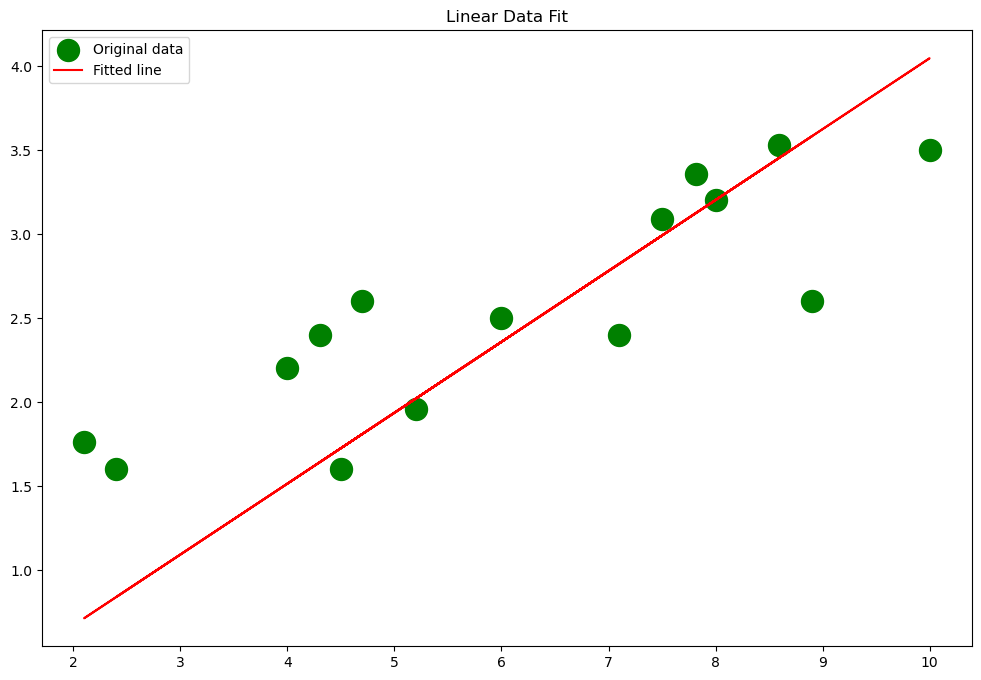

In [4]:
# Use trained model to predict Y for every X and plot
model.eval() # Put the model in "evaluation mode", this turns off dropout and batch normalization.
predictions = model(x_train_tensor).to(device)
plt.figure(figsize=(12,8))
plt.scatter(x_train_numpy, y_train_numpy, label='Original data', s=250, c='g')
plt.plot(x_train_numpy, predictions.detach().cpu().numpy(), 'r', label='Fitted line')
plt.title("Linear Data Fit")
plt.legend()
plt.show()